# 1.Extract-Transform-Load (ETL)

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("./data/Titanic_passenger.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()
# sibsp - Number of Siblings/Spouses Aboard
# parch - Number of Parents/Children Aboard
# embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2.Exploratory Data Analysis (EDA)

## 2.1 Univariate Analysis
- look at one variable
- main tools - countplot and displot
- countplot for discrete features
- displot for continuous features

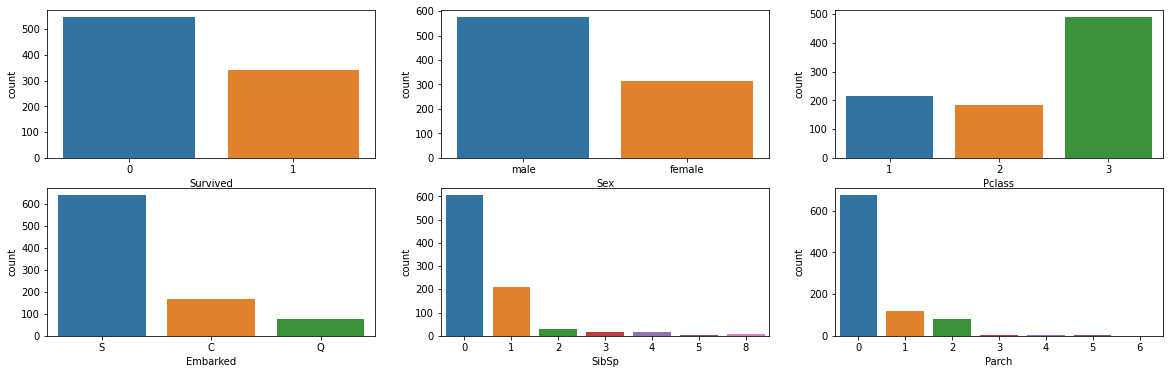

In [7]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
plt.figure(figsize=(20,6))
for idx,uni in enumerate(category1):
    plt.subplot(2,3,idx+1)
    sns.countplot(data=df,x=uni)
plt.show()

In [8]:
category2 = ["Cabin", "Ticket"]
for c in category2:
    print("{} \n".format(df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64 



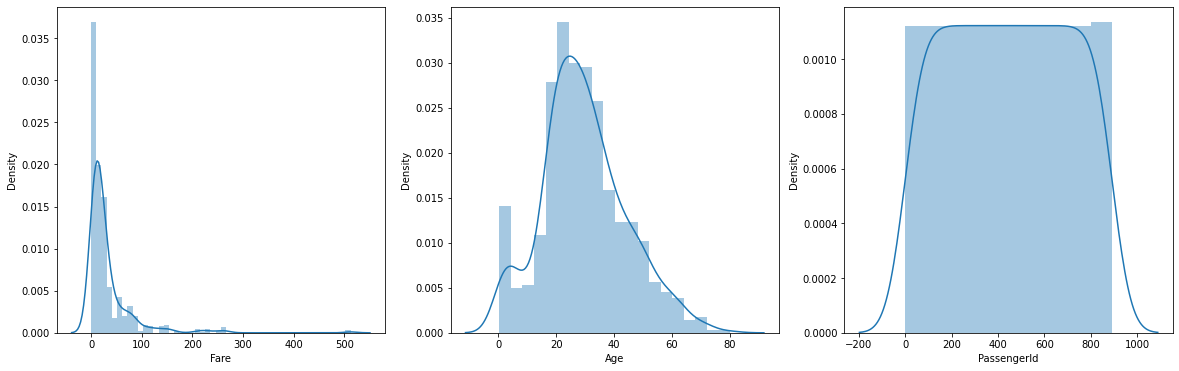

In [9]:
numeric = ["Fare", "Age","PassengerId"]
plt.figure(figsize=(20,6))
for idx,num in enumerate(numeric):
    plt.subplot(1,3,idx+1)
    sns.distplot(df[num])
plt.show()

## Basic Data Analysis

In [10]:
# Plcass vs Survived
df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
# Sex vs Survived
df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
# Sibsp vs Survived
df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
# Parch vs Survived
df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## 2.2 Multivariate analysis
- look at two featuress/labels at the same time
- e.g., see how bathroomms affect Rent -> bivaraint analysis
- e.g., see hwo size affect Rent
- usually, y is label and x is any giben feature
- Goal: which factor/features are somwhow related tomy label, i.e., Rent
- boxplot : for discrete vs continuous features
- scatterplot : for continuous vs continuous features

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

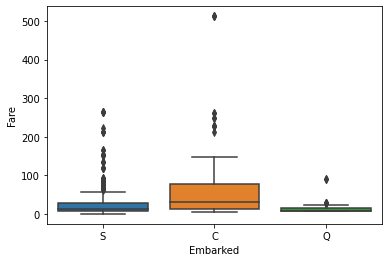

In [14]:
#Boxplot : 1 discrete and 1 continuous
sns.boxplot(x=df['Embarked'],y=df['Fare'])

In [15]:
#Scatter plot is not available for binary output

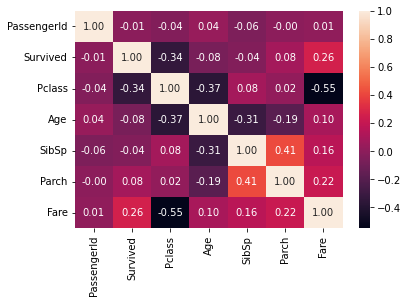

In [16]:
sns.heatmap(df.corr(), annot = True, fmt = ".2f")
plt.show()

# 3. Feature Extraction / Selection

## Feature Engineering

In [17]:
name = df["Name"]
df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
df['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [18]:
# convert to categorical
df["Title"] = df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in df["Title"]]
df["Title"].value_counts()

2    517
1    310
0     40
3     24
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='count'>

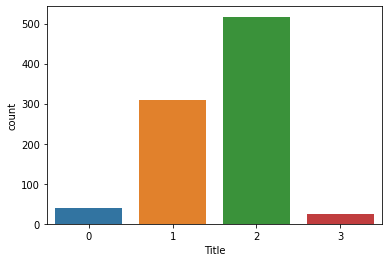

In [19]:
sns.countplot(x="Title", data = df)

### Drop Unnecessary Feature

In [20]:
df.shape

(891, 13)

In [21]:
df.drop(["Name","PassengerId", "Cabin"], axis = 1, inplace = True)

In [22]:
df.shape

(891, 10)

In [23]:
x = df.drop(labels='Survived',axis=1)
y = df['Survived']

# 4. Cleaning/Preprocessing
- Fill

In [24]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Title         0
dtype: int64

In [25]:
#Age
mean = df['Age'].mean()
df['Age'].fillna(mean,inplace=True)

In [26]:
#Embarked
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
df["Embarked"] = df["Embarked"].fillna("S")

In [28]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
dtype: int64

- Changing object to int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
 9   Title     891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [30]:
#Priority Class
df["Pclass"] = df["Pclass"].astype("category")
df = pd.get_dummies(df, columns= ["Pclass"])
df.head()

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3
0,0,male,22.0,1,0,A/5 21171,7.2500,S,2,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C,1,1,0,0
2,1,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1
3,1,female,35.0,1,0,113803,53.1000,S,1,1,0,0
4,0,male,35.0,0,0,373450,8.0500,S,2,0,0,1


In [31]:
#Sex
m = df['Sex'] == 'male'
f = df['Sex'] == 'female'
df['Sex'][m] = 0
df['Sex'][f] = 1

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    object 
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Title     891 non-null    int64  
 9   Pclass_1  891 non-null    uint8  
 10  Pclass_2  891 non-null    uint8  
 11  Pclass_3  891 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(3)
memory usage: 65.4+ KB


## Apppendix

In [33]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [34]:
df.loc[detect_outliers(df,["Age","SibSp","Parch","Fare"])]

,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Pclass_1,Pclass_2,Pclass_3
7,0,0,2.000000,3,1,349909,21.0750,S,0,0,0,1
16,0,0,2.000000,4,1,382652,29.1250,Q,0,0,0,1
119,0,1,2.000000,4,2,347082,31.2750,S,1,0,0,1
164,0,0,1.000000,4,1,3101295,39.6875,S,0,0,0,1
268,1,1,58.000000,0,1,PC 17582,153.4625,S,1,1,0,0
297,0,1,2.000000,1,2,113781,151.5500,S,1,1,0,0
305,1,0,0.920000,1,2,113781,151.5500,S,0,1,0,0
386,0,0,1.000000,5,2,CA 2144,46.9000,S,0,0,0,1
438,0,0,64.000000,1,4,19950,263.0000,S,2,1,0,0
587,1,0,60.000000,1,1,13567,79.2000,C,2,1,0,0


## Reference
https://www.kaggle.com/code/kanncaa1/dataiteam-titanic-eda/notebook